# Installing all dependencies

To install any dependency in Google Colab using system commands, we have to use the '!' mark in front of the command such as  
<mark>!pip3 install pandas</mark> 
and the dependencies get installed.

In [0]:
!pip3 install geopandas

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 10.1MB 36.1MB/s 
     |████████████████████████████████| 11.8MB 37.2MB/s 


In [0]:
!pip3 install Shapely

In [0]:
!apt-get install libproj-dev proj-data proj-bin  
!apt-get install libgeos-dev  
!pip3 install cython && pip3 install geoplot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 2s (112 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3

In [0]:
!pip3 install seaborn && pip3 install natsort

In [0]:
!unzip ne_10m_admin_1_states_provinces.zip

Archive:  ne_10m_admin_1_states_provinces.zip
  inflating: ne_10m_admin_1_states_provinces.README.html  
 extracting: ne_10m_admin_1_states_provinces.VERSION.txt  
 extracting: ne_10m_admin_1_states_provinces.cpg  
  inflating: ne_10m_admin_1_states_provinces.dbf  
  inflating: ne_10m_admin_1_states_provinces.prj  
  inflating: ne_10m_admin_1_states_provinces.shp  
  inflating: ne_10m_admin_1_states_provinces.shx  


# New Section

# Import all Dependencies

Since we are concerned about Data Analysis for this project we will mainly use the following packages :
* Numpy (For calculations [if required]) 
* Pandas (Handling Data)
* GeoPandas (For Geological Plot)
* Seaborn (For Visualization)
* Maplotlib (Since it serves as a backend for the above visualizations)
* Shapely (Since we will be dealing with geometry)
* OS (to handle os operations)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import os

In [0]:
## Load the dataset
# df = pd.concat(pd.read_excel('Corona.xlsx', sheet_name=None), ignore_index=True)
# df = df[['Country/Region','Province/State','Confirmed','Deaths','Recovered','Last Update']]
# df[['Recovered','Deaths','Confirmed']].fillna(0, inplace=True)
# df['Last Update'] = df['Last Update'].dt.date
# df.drop_duplicates(inplace=True)
# df

## The above code was eliminated because they have stopped updating the Google Sheet and moved those into GitHub with new format
df = pd.read_csv('Confirmed.csv')
df.iloc[:,3:] = df.iloc[:,3:].fillna(0)
df


,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50
0,Anhui,Mainland China,31.82571,117.2264,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665.0,733.0,733.0,779.0,779.0,830.0,830.0,830.0,860
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297.0,315.0,315.0,326.0,326.0,337.0,337.0,337.0,342
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,247.0,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415.0,426.0,428.0,446.0,450.0,468.0,473.0,486.0,489
3,Fujian,Mainland China,26.07783,117.9895,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224.0,239.0,239.0,250.0,250.0,261.0,261.0,261.0,267
4,Gansu,Mainland China,36.06110,103.8343,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67.0,71.0,79.0,79.0,79.0,83.0,83.0,86.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,"San Benito, CA",US,36.57610,-120.9876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
69,NaN,Belgium,50.50390,4.4699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
70,"Madison, WI",US,43.07310,-89.4012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
71,Diamond Princess cruise ship,Others,35.44370,129.6380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,61.0,61.0,61.0,64.0,64.0,64.0,135.0,135


# Why China?
The advent of Corona Virus was in China. From news reports we found that the effect started to take place from 31st Dec 2019, because of which we wanted to analyze and a take a look of what's gonna happen in the upcoming days.

In [0]:
china_df = df[df['Country/Region']=='Mainland China']
china_df

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50
0,Anhui,Mainland China,31.82571,117.22640,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665.0,733.0,733.0,779.0,779.0,830.0,830.0,830.0,860
1,Beijing,Mainland China,40.18238,116.41420,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297.0,315.0,315.0,326.0,326.0,337.0,337.0,337.0,342
2,Chongqing,Mainland China,30.05718,107.87400,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,247.0,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415.0,426.0,428.0,446.0,450.0,468.0,473.0,486.0,489
3,Fujian,Mainland China,26.07783,117.98950,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224.0,239.0,239.0,250.0,250.0,261.0,261.0,261.0,267
4,Gansu,Mainland China,36.06110,103.83430,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67.0,71.0,79.0,79.0,79.0,83.0,83.0,86.0,86
5,Guangdong,Mainland China,23.33841,113.42200,17.0,26.0,32.0,53.0,53.0,78.0,78.0,98.0,111.0,146.0,151.0,151.0,151.0,207.0,207.0,241.0,277.0,277.0,311.0,354.0,436.0,535.0,683.0,725.0,797.0,870.0,895.0,944.0,970.0,970.0,1034.0,1075.0,1095.0,1120.0,1131.0,1151.0,1159.0,1159.0,1177
6,Guangxi,Mainland China,23.82908,108.78810,0.0,2.0,5.0,13.0,23.0,23.0,23.0,33.0,36.0,46.0,46.0,46.0,51.0,51.0,51.0,58.0,58.0,58.0,78.0,78.0,87.0,100.0,127.0,139.0,139.0,150.0,150.0,168.0,168.0,168.0,172.0,183.0,183.0,195.0,195.0,210.0,210.0,210.0,215
7,Guizhou,Mainland China,26.81536,106.87480,0.0,1.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,12.0,12.0,29.0,29.0,46.0,56.0,56.0,64.0,64.0,69.0,71.0,71.0,81.0,89.0,89.0,96.0,99.0,109.0,109.0,109.0,127
8,Hainan,Mainland China,19.19673,109.74550,0.0,4.0,5.0,8.0,8.0,17.0,19.0,19.0,22.0,22.0,33.0,33.0,33.0,40.0,40.0,43.0,43.0,43.0,43.0,46.0,52.0,62.0,71.0,79.0,79.0,91.0,91.0,100.0,106.0,106.0,117.0,124.0,124.0,128.0,131.0,136.0,138.0,138.0,144
9,Hebei,Mainland China,38.04280,114.51490,0.0,1.0,1.0,2.0,2.0,8.0,8.0,13.0,13.0,18.0,18.0,18.0,33.0,33.0,33.0,48.0,48.0,48.0,65.0,65.0,82.0,96.0,113.0,126.0,126.0,135.0,135.0,157.0,157.0,157.0,172.0,195.0,195.0,206.0,206.0,218.0,218.0,218.0,239


# Present Scenario
The present scenario which showed here is of 11th Feb 2020. The updated data we got from John Hopkins website. 
https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

In [0]:
_present = china_df.iloc[:,0:2]
_present['Confirmed'] = china_df.iloc[:,-1]
_present

,Province/State,Country/Region,Confirmed
0,Anhui,Mainland China,860
1,Beijing,Mainland China,342
2,Chongqing,Mainland China,489
3,Fujian,Mainland China,267
4,Gansu,Mainland China,86
5,Guangdong,Mainland China,1177
6,Guangxi,Mainland China,215
7,Guizhou,Mainland China,127
8,Hainan,Mainland China,144
9,Hebei,Mainland China,239


In [0]:
worldmap = gpd.read_file(os.path.join(os.getcwd(),'ne_10m_admin_1_states_provinces.shp'))
worldmap.head(5)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,name_local,type,type_en,code_local,code_hasc,note,hasc_maybe,region,region_cod,provnum_ne,gadm_level,check_me,datarank,abbrev,postal,area_sqkm,sameascity,labelrank,name_len,mapcolor9,mapcolor13,fips,fips_alt,woe_id,woe_label,woe_name,latitude,longitude,sov_a3,adm0_a3,...,gn_id,gn_name,gns_id,gns_name,gn_level,gn_region,gn_a1_code,region_sub,sub_code,gns_level,gns_lang,gns_adm1,gns_region,min_label,max_label,min_zoom,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
0,Admin-1 scale rank,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,None,Provincia,Province,None,AR.ER,None,None,None,None,10,1,20,3,None,ER,0,-99,3,10,3,13,AR08,None,2344682,"Entre Rios, AR, Argentina",Entre Ríos,-32.02750,-59.2824,ARG,ARG,...,3434137,Provincia de Entre Rios,-988655,Entre Rios,1,None,AR.08,None,None,1,khm,AR08,None,6.0,11.0,6.0,Q44762,إنتري ريوس,এন্ত্রে রিও প্রদেশ,Entre Ríos,Entre Ríos Province,Entre Ríos,Entre Ríos,Έντρε Ρίος,एन्ट्रे रियोस,Entre Ríos tartomány,Provinsi Entre Ríos,provincia di Entre Ríos,エントレ・リオス州,엔트레리오스 주,Entre Ríos,Entre Ríos,Entre Ríos,Энтре-Риос,Entre Ríos,Entre Ríos eyaleti,Entre Ríos,恩特雷里奥斯省,1159309789,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 scale rank,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,None,Departamento,Department,None,UY.PA,None,None,None,None,19,1,0,8,None,PA,0,-99,6,8,2,10,UY11,None,2347650,"PaysandÃº, UY, Uruguay",Paysandú,-32.09330,-57.2240,URY,URY,...,3441242,Departamento de Paysandu,-908097,"Paysandu, Departamento de",1,None,UY.11,None,None,1,fra,UY11,None,8.0,11.0,8.0,Q16576,إدارة بايساندو,পেসান্ডো বিভাগ,Departamento Paysandú,Paysandú Department,Departamento de Paysandú,Paysandú,Παϊσαντού,पयसंदु विभाग,Paysandú megye,Departemen Paysandú,dipartimento di Paysandú,パイサンドゥ県,파이산두 주,Paysandú,Paysandú,Paysandú,Пайсанду,Paysandú,Paysandu Departmanı,Paysandú,派桑杜省,1159307733,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4..."
2,Admin-1 scale rank,3,PAK-1114,1114,PK-SD,None,PK,1,Sind,Sindh,None,Province,Province,None,PK.SD,None,None,None,None,2,1,20,2,None,SD,0,-99,3,4,3,11,PK05,None,2346499,"Sindh, PK, Pakistan",Sind,26.37340,68.8685,PAK,PAK,...,1164807,Sindh,-2774813,Sindh,1,None,PK.05,None,None,1,rus,PK05,None,5.0,10.5,5.0,Q37211,السند,সিন্ধু প্রদেশ,Sindh,Sindh,Sindh,Sind,Σιντ,सिंध,Szindh,Sindh,Sindh,シンド州,신드 주,Sindh,Sindh,Sind,Синд,Sindh,Sind Eyaleti,Sindh,信德省,1159309351,"MULTIPOLYGON (((68.18304 23.84216, 68.18301 23..."
3,Admin-1 scale rank,2,IND-3264,3264,IN-GJ,None,IN,1,Gujarat,None,None,None,None,None,IN.GJ,None,None,West,None,20064,1,20,1,None,None,0,-99,2,7,2,2,IN32,None,2345743,"Gujarat, IN, India",Gujarat,22.75010,71.3013,IND,IND,...,1270770,State of Gujarat,-2096768,"Gujarat, State of",1,None,IN.09,None,None,1,nld,IN09,None,4.6,10.1,4.6,Q1061,غوجارات,গুজরাত,Gujarat,Gujarat,Guyarat,Gujarat,Γκουτζαράτ,गुजरात,Gudzsarát,Gujarat,Gujarat,グジャラート州,구자라트 주,Gujarat,Gudźarat,Gujarate,Гуджарат,Gujarat,Gucerat,Gujarat,古吉拉特邦,1159314179,"POLYGON ((68.18301 23.84209, 68.18304 23.84216..."
4,Admin-1 scale rank,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,None,Propinsi,Province,None,ID.KI,None,None,None,None,15,1,20,1,None,KI,0,-99,2,16,6,11,ID14,None,2345723,"East Kalimantan, ID, Indonesia",Kalimantan Timur,1.28915,116.3540,IDN,IDN,...,1641897,Provinsi Kalimantan Timur,-2680740,"Kalimantan Timur, Provinsi",1,None,ID.14,None,None,1,ind,ID14,None,5.0,10.1,4.6,Q3899,كالمنتان الشرقية,কিলিমান্তান তিমুর,Ostkalimantan,East Kalimantan,Kalimantan Oriental,Kalimantan oriental,Ανατολικό Καλιμαντάν,पूर्व कालिमंतान,None,Kalimantan Timur,Kalimantan Orientale,東カリマンタン州,칼리만탄티무르 주,Oost-Kalimantan,Borneo Wschodnie,Kalimantan Oriental,Восточный Калимантан,Kalimantan Timur,Doğu Kalimantan,Đông Kalimantan,東加里曼丹省,1159310009,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."


In [0]:
chinamap = worldmap.loc[worldmap['adm0_a3'] == 'CHN']
chinamap['Confirmed'] = 0
# chinamap['Deaths'] = 0
# chinamap['Recovered'] = 0
for states in _present['Province/State'].unique():
  # print(states)
  # print(chinamap['Confirmed'].loc[chinamap['name_en'] == states] )
  # print(grouped_total['Confirmed'].loc[grouped_total['Province/State'] == states].tolist()[0])
  # input()
  chinamap['Confirmed'].loc[chinamap['name_en'] == states] = _present['Confirmed'].loc[_present['Province/State'] == states].tolist()[0]
  # chinamap['Deaths'].loc[chinamap['name_en'] == states] = grouped_present['Deaths'].loc[grouped_present['Province/State'] == states].tolist()[0]
  # chinamap['Recovered'].loc[chinamap['name_en'] == states] = grouped_present['Recovered'].loc[grouped_present['Province/State'] == states].tolist()[0]
chinamap['coords'] = chinamap['geometry'].apply(lambda x: x.representative_point().coords[:])
chinamap['coords'] = [coords[0] for coords in chinamap['coords']]
chinamap

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remo

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,name_local,type,type_en,code_local,code_hasc,note,hasc_maybe,region,region_cod,provnum_ne,gadm_level,check_me,datarank,abbrev,postal,area_sqkm,sameascity,labelrank,name_len,mapcolor9,mapcolor13,fips,fips_alt,woe_id,woe_label,woe_name,latitude,longitude,sov_a3,adm0_a3,...,gns_id,gns_name,gn_level,gn_region,gn_a1_code,region_sub,sub_code,gns_level,gns_lang,gns_adm1,gns_region,min_label,max_label,min_zoom,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry,Confirmed,coords
17,Admin-1 scale rank,2,CHN-1756,1756,CN-65,None,CN,1,Xinjiang,Xinjiang Uygur|Xīnjiāng Wéiwúěr,新疆維吾爾自治區|新疆维吾尔自治区,Zìzhìqu,Autonomous Region,None,CN.XJ,None,None,Northwest China,6,49,1,20,1,None,XJ,0,-99,2,8,4,3,CH13,None,12578003,"Xinjiang, CN, China",Xinjiang,41.1220,85.4253,CH1,CHN,...,-1933787,Xinjiang Uygur Zizhiqu,1,None,CN.13,Western,None,1,uig,CH13,None,4.6,10.1,4.6,Q34800,سنجان,শিনচিয়াং,Xinjiang,Xinjiang,Sinkiang,Xinjiang,Σιντζιάνγκ,शिंजियांग,Hszincsiang-Ujgur Autonóm Terület,Xinjiang,Sinkiang,新疆ウイグル自治区,신장 위구르 자치구,Sinkiang,Sinciang,Xinjiang,Синьцзян-Уйгурский автономный район,Xinjiang,Sincan Uygur Özerk Bölgesi,Tân Cương,新疆维吾尔自治区,1159312657,"POLYGON ((77.88313 35.43107, 77.85709 35.43660...",55,"(87.11170094657875, 41.75680633600004)"
18,Admin-1 scale rank,2,CHN-1662,1662,CN-54,None,CN,1,Xizang,Tibet|Xīzàng,西藏自治區|西藏自治区,Zìzhìqu,Autonomous Region,None,CN.XZ,None,None,Southwest China,5,48,1,20,1,None,XZ,0,-99,2,6,4,3,CH14,None,12578004,"Tibet, CN, China",Xizang,31.4515,88.4137,CH1,CHN,...,-1934604,Xizang Zizhiqu,1,None,CN.14,Western,None,1,zho,CH14,None,4.6,10.1,4.6,Q17269,منطقة التبت ذاتية الحكم,তিব্বত স্বায়ত্তশাসিত অঞ্চল,Tibet,Tibet,Tíbet,Tibet,Θιβέτ,बोड स्वायत्त क्षेत्र,Tibeti Autonóm Terület,Tibet,regione autonoma del Tibet,チベット自治区,티베트 자치구,Tibetaanse Autonome Regio,Tybetański Region Autonomiczny,Região Autônoma do Tibete,Тибетский автономный район,Autonoma regionen Tibet,Tibet Özerk Bölgesi,Khu tự trị Tây Tạng,西藏自治区,1159312655,"POLYGON ((78.91769 33.38626, 78.91595 33.38766...",1,"(87.05266113044819, 31.885470483228566)"
118,Admin-1 scale rank,2,CHN-1838,1838,CN-15,None,CN,1,Inner Mongol,Nei Mongol|Nèiměnggǔ,內蒙古自治區|内蒙古自治区,Zìzhìqu,Autonomous Region,None,CN.NM,None,None,North China,1,43,1,20,1,None,NM,0,-99,2,12,4,3,CH20,None,12578009,"Nei Mongol, CN, China",Inner Mongol,41.5938,111.6230,CH1,CHN,...,-1920094,Nei Mongol Zizhiqu,1,None,CN.20,Western,None,1,zho,CH20,None,4.6,10.1,4.6,Q41079,منغوليا الداخلية,অন্তর্দেশীয় মঙ্গোলিয়া,Innere Mongolei,Inner Mongolia,Mongolia Interior,Mongolie-Intérieure,Εσωτερική Μογγολία,भीतरी मंगोलिया,Belső-Mongólia Autonóm Terület,Mongolia Dalam,Mongolia Interna,内モンゴル自治区,내몽골 자치구,Binnen-Mongolië,Mongolia Wewnętrzna,Mongólia Interior,Внутренняя Монголия,Inre Mongoliet,İç Moğolistan,Nội Mông,内蒙古自治区,1159312757,"POLYGON ((115.91451 47.68391, 115.85270 47.705...",58,"(118.36251766464233, 45.36012563763805)"
124,Admin-1 scale rank,2,CHN-1150,1150,CN-62,None,CN,1,Gansu,Gānsù,甘肅|甘肃,Shěng,Province,None,CN.GS,None,None,Northwest China,6,39,1,20,1,None,GS,0,-99,2,5,4,3,CH15,None,12578005,"Gansu, CN, China",Gansu,38.7393,100.7350,CH1,CHN,...,-1906131,Gansu Sheng,1,None,CN.15,Western,None,1,zho,CH15,None,4.6,10.1,4.6,Q42392,قانسو,কানসু,Gansu,Gansu,Gansu,Gansu,Γκανσού,गांसू,Kanszu,Gansu,Gansu,甘粛省,간쑤성,Gansu,Gansu,Gansu,Ганьсу,Gansu,Kansu,Cam Túc,甘肃省,1159310923,"POLYGON ((96.36634 42.72292, 96.37926 42.72055...",86,"(102.87796930504012, 37.69377187767)"
261,Admin-1 scale rank,2,CHN-1810,1810,CN-53,None,CN,1,Yunnan,Yúnnán,雲南|云南,Shěng,Province,None,CN.YN,None,None,Southwest China,5,47,1,20,1,None,YN,0,-99,2,6,4,3,CH29,None,12578018,"Yunnan, CN, China",Yunnan,24.4603,101.6610,CH1,CHN,...,-1937567,Yunnan Sheng,1,None,CN.29,Western,None,1,zho,CH29,None,4.6,10.1,4.6,Q43194,يونان,ইউনান,Yunnan,Yunnan,Yunnan,Yunnan,Γιουνάν

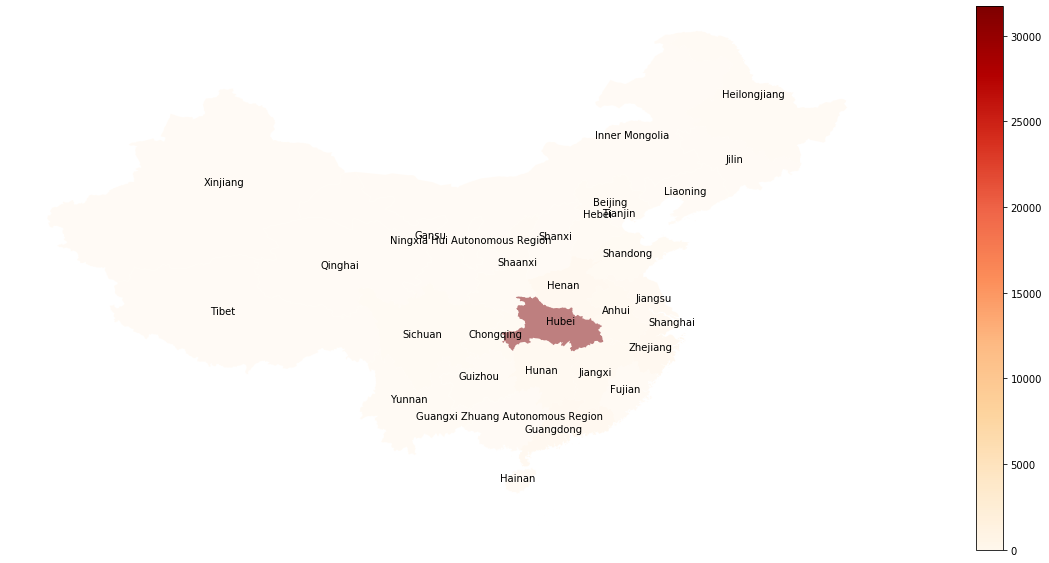

In [0]:
fig,ax = plt.subplots(figsize=(32,10))
ax.axis('off')
chinamap.plot(ax=ax, alpha=0.5, column='Confirmed', cmap='OrRd' ,legend=True)
for idx, rows in chinamap.iterrows():
  plt.annotate(s=rows['name_en'], xy=rows['coords'], horizontalalignment='center')
plt.savefig('Hubei-Present.png')

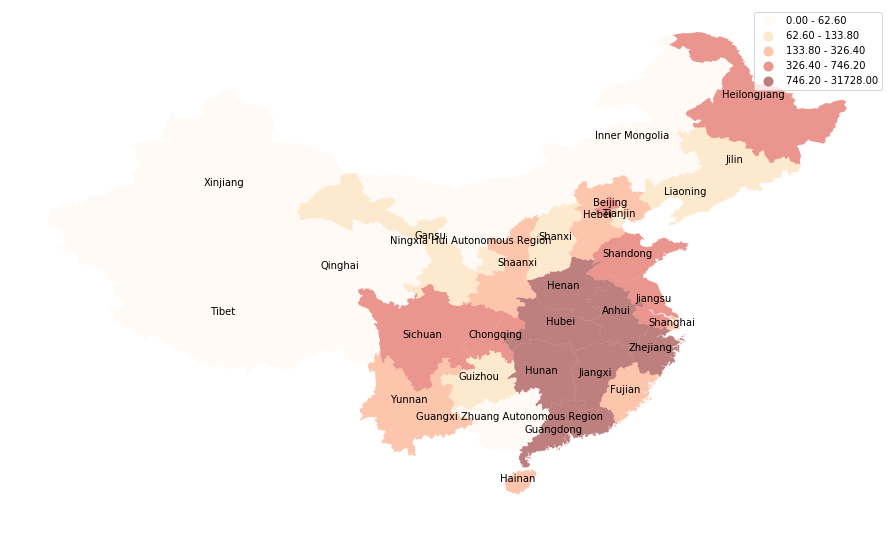

In [0]:
fig,ax = plt.subplots(figsize=(32,10))
ax.axis('off')
chinamap.plot(ax=ax, alpha=0.5, column='Confirmed', cmap='OrRd', scheme='quantiles', legend=True)
for idx, rows in chinamap.iterrows():
  plt.annotate(s=rows['name_en'], xy=rows['coords'], horizontalalignment='center')
plt.savefig('China-Present.png')

# Analysis 1
Since from the ${1st}$ map visualization we can see that $Hubei$ is the most affected area with a confirmed value of $444.0$ as of today. Hence we will go through the time series of $Hubei$ to draw more inference.


In [0]:
hubei = china_df.loc[china_df['Province/State'] == 'Hubei']
# hubei[['Deaths', 'Confirmed','Recovered']] = hubei[['Deaths', 'Confirmed','Recovered']].fillna(0)
hubei

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50
12,Hubei,Mainland China,30.97564,112.2707,270.0,444.0,444.0,549.0,549.0,729.0,761.0,1052.0,1058.0,1423.0,1423.0,1423.0,2714.0,2714.0,3554.0,3554.0,3554.0,3554.0,4586.0,4903.0,5806.0,7153.0,11177.0,13522.0,13522.0,16678.0,16678.0,19665.0,19665.0,19665.0,22112.0,24953.0,24953.0,27100.0,27100.0,29631.0,29631.0,31728.0,31728


# Time Series for Confirmed
* First we will see how the confirmed cases are hyping day by day (through line-plot)

In [0]:
# hubei_confirmed_data = hubei[["Last Update","Confirmed"]]
hubei_confirmed_data = hubei.iloc[:,4:]
hubei_confirmed_data = hubei_confirmed_data.iloc[:,:].values[0]
# hubei_confirmed_data.columns
# hubei_confirmed_data.rename(columns={12:"Confirmed", "":"Update"})
hubei_confirmed_data

array([  270.,   444.,   444.,   549.,   549.,   729.,   761.,  1052.,
        1058.,  1423.,  1423.,  1423.,  2714.,  2714.,  3554.,  3554.,
        3554.,  3554.,  4586.,  4903.,  5806.,  7153., 11177., 13522.,
       13522., 16678., 16678., 19665., 19665., 19665., 22112., 24953.,
       24953., 27100., 27100., 29631., 29631., 31728., 31728.])

In [0]:
hubei_confirmed_data.shape

(39,)

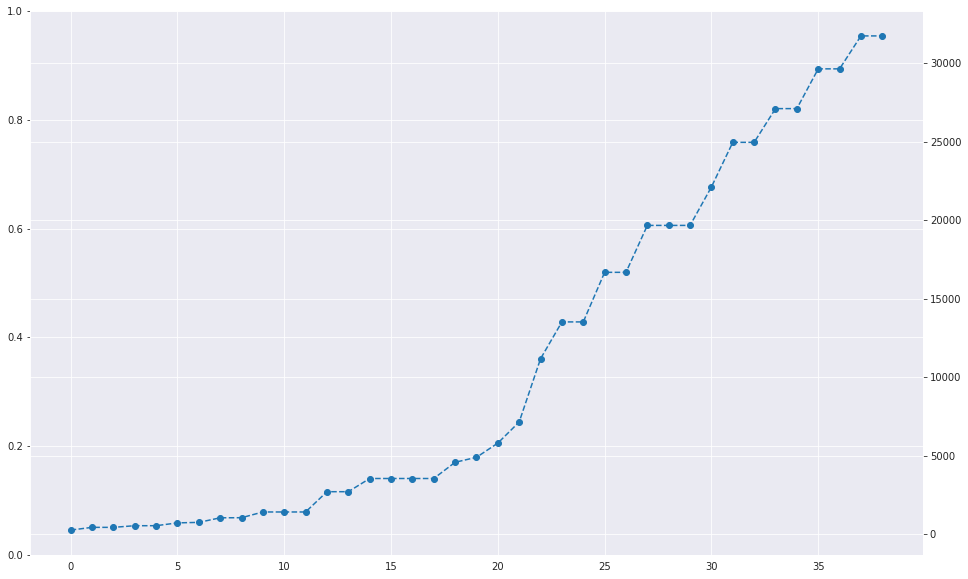

In [0]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
# sns.lineplot(x="", y="Confirmed", data=hubei_confirmed_data, marker=True)
time = [i for i in range(len(hubei_confirmed_data))]
plt.twinx()
plt.plot(time,hubei_confirmed_data,'o--')

In [0]:
confirmed_data = hubei_confirmed_data.astype('float')
confirmed_data

array([  270.,   444.,   444.,   549.,   549.,   729.,   761.,  1052.,
        1058.,  1423.,  1423.,  1423.,  2714.,  2714.,  3554.,  3554.,
        3554.,  3554.,  4586.,  4903.,  5806.,  7153., 11177., 13522.,
       13522., 16678., 16678., 19665., 19665., 19665., 22112., 24953.,
       24953., 27100., 27100., 29631., 29631., 31728., 31728.])

In [0]:
train_data_confirmed = confirmed_data[:-8]
test_data_confirmed = confirmed_data[-8:]
print('Length of Train Data: {}'.format(len(train_data_confirmed)))

Length of Train Data: 31


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_confirmed_normalized = scaler.fit_transform(train_data_confirmed.reshape(-1,1))
# mean = train_data_confirmed_normalized.mean()
# std = train_data_confirmed_normalized.std()
# train_data_confirmed_normalized = (train_data_confirmed_normalized - mean)/std
train_data_confirmed_normalized

array([[-0.89733796],
       [-0.87270958],
       [-0.87270958],
       [-0.85784762],
       [-0.85784762],
       [-0.83236998],
       [-0.82784063],
       [-0.78665178],
       [-0.78580252],
       [-0.73413953],
       [-0.73413953],
       [-0.73413953],
       [-0.55140824],
       [-0.55140824],
       [-0.4325126 ],
       [-0.4325126 ],
       [-0.4325126 ],
       [-0.4325126 ],
       [-0.2864408 ],
       [-0.24157185],
       [-0.11375903],
       [ 0.07689864],
       [ 0.64646541],
       [ 0.97838242],
       [ 0.97838242],
       [ 1.42509036],
       [ 1.42509036],
       [ 1.84787762],
       [ 1.84787762],
       [ 1.84787762],
       [ 2.19423196]])

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable


In [0]:
train_data_confirmed_normalized_tensor = torch.FloatTensor(train_data_confirmed_normalized).view(-1)
train_data_confirmed_normalized_tensor

tensor([-0.8973, -0.8727, -0.8727, -0.8578, -0.8578, -0.8324, -0.8278, -0.7867,
        -0.7858, -0.7341, -0.7341, -0.7341, -0.5514, -0.5514, -0.4325, -0.4325,
        -0.4325, -0.4325, -0.2864, -0.2416, -0.1138,  0.0769,  0.6465,  0.9784,
         0.9784,  1.4251,  1.4251,  1.8479,  1.8479,  1.8479,  2.1942])

In [0]:
def create_inout_sequences(input_data, train_window):
  inout_seq = []
  L = len(input_data)
  for i in range(L-train_window):
    train_seq = input_data[i:i+train_window]
    label_seq = input_data[i+train_window:i+train_window+1]
    inout_seq.append((train_seq, label_seq))
  return inout_seq

In [0]:
confirmed_train_inout_seq = create_inout_sequences(train_data_confirmed_normalized_tensor, 1)
confirmed_train_inout_seq

[(tensor([-0.8973]), tensor([-0.8727])),
 (tensor([-0.8727]), tensor([-0.8727])),
 (tensor([-0.8727]), tensor([-0.8578])),
 (tensor([-0.8578]), tensor([-0.8578])),
 (tensor([-0.8578]), tensor([-0.8324])),
 (tensor([-0.8324]), tensor([-0.8278])),
 (tensor([-0.8278]), tensor([-0.7867])),
 (tensor([-0.7867]), tensor([-0.7858])),
 (tensor([-0.7858]), tensor([-0.7341])),
 (tensor([-0.7341]), tensor([-0.7341])),
 (tensor([-0.7341]), tensor([-0.7341])),
 (tensor([-0.7341]), tensor([-0.5514])),
 (tensor([-0.5514]), tensor([-0.5514])),
 (tensor([-0.5514]), tensor([-0.4325])),
 (tensor([-0.4325]), tensor([-0.4325])),
 (tensor([-0.4325]), tensor([-0.4325])),
 (tensor([-0.4325]), tensor([-0.4325])),
 (tensor([-0.4325]), tensor([-0.2864])),
 (tensor([-0.2864]), tensor([-0.2416])),
 (tensor([-0.2416]), tensor([-0.1138])),
 (tensor([-0.1138]), tensor([0.0769])),
 (tensor([0.0769]), tensor([0.6465])),
 (tensor([0.6465]), tensor([0.9784])),
 (tensor([0.9784]), tensor([0.9784])),
 (tensor([0.9784]), ten

In [0]:
class LSTMModel(nn.Module):
  def __init__(self, input_size=1, hidden_layer_size=10, output_size=1):
    super(LSTMModel, self).__init__()
    self.hidden_layer_size = hidden_layer_size
    self.lstm = nn.LSTM(input_size, hidden_layer_size)
    self.linear = nn.Linear(hidden_layer_size, output_size)
    self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size), torch.zeros(1,1, self.hidden_layer_size))

  def forward(self, x):
    lstm_out, self.hidden_cell = self.lstm(x.view(len(x), 1, -1), self.hidden_cell)
    predictions = self.linear(lstm_out.view(len(lstm_out), -1))
    return predictions[-1]

model = LSTMModel()


In [0]:
model

LSTMModel(
  (lstm): LSTM(1, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)

In [0]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [0]:
epochs = 10000
for i in range(epochs):
  model.train()
  # prev = 0
  for seq,labels in confirmed_train_inout_seq:
    optimizer.zero_grad()
    # if prev!=0:
    #   seq = prev
    model.hidden_cell = (torch.zeros(1,1,model.hidden_layer_size), torch.zeros(1,1,model.hidden_layer_size))
    y_pred = model(seq)
    # prev = y_pred
    single_loss = loss_func(y_pred, labels)
    single_loss.backward()
    optimizer.step()
  if i % 10 == 0:
    print('Epoch : {}, Loss: {:.9f}'.format(i, single_loss.data))
print('Optimization Complete')

Epoch : 0, Loss: 3.562967777
Epoch : 10, Loss: 0.105826668
Epoch : 20, Loss: 0.043910764
Epoch : 30, Loss: 0.084367007
Epoch : 40, Loss: 0.051922232
Epoch : 50, Loss: 0.069244958
Epoch : 60, Loss: 0.054291073
Epoch : 70, Loss: 0.057261016
Epoch : 80, Loss: 0.050893210
Epoch : 90, Loss: 0.049272463
Epoch : 100, Loss: 0.046436086
Epoch : 110, Loss: 0.044273723
Epoch : 120, Loss: 0.042437755
Epoch : 130, Loss: 0.040703416
Epoch : 140, Loss: 0.039237697
Epoch : 150, Loss: 0.037926614
Epoch : 160, Loss: 0.036784358
Epoch : 170, Loss: 0.035802204
Epoch : 180, Loss: 0.034970976
Epoch : 190, Loss: 0.034009811
Epoch : 200, Loss: 0.033842847
Epoch : 210, Loss: 0.033405662
Epoch : 220, Loss: 0.033022858
Epoch : 230, Loss: 0.032849003
Epoch : 240, Loss: 0.032827489
Epoch : 250, Loss: 0.032902524
Epoch : 260, Loss: 0.033064116
Epoch : 270, Loss: 0.033317350
Epoch : 280, Loss: 0.033660457
Epoch : 290, Loss: 0.034083188
Epoch : 300, Loss: 0.034572631
Epoch : 310, Loss: 0.035117280
Epoch : 320, Loss: 

In [0]:
fut_pred = 8
# test_inputs = train_data_confirmed_normalized_tensor[-fut_pred:].tolist()
# test_inputs
test_inputs = test_data_confirmed.tolist()
test_inputs = scaler.fit_transform(np.asarray(test_inputs).reshape(-1,1)).reshape(1,-1)[0].tolist()
test_inputs

[-1.3296597847620053,
 -1.3296597847620053,
 -0.4900187383255272,
 -0.4900187383255272,
 0.4997956485076008,
 0.4997956485076008,
 1.3198828745799316,
 1.3198828745799316]

In [0]:
model.eval()
print(model)
for i in range(fut_pred):
  seq = torch.FloatTensor(test_inputs[-1:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1, model.hidden_layer_size), torch.zeros(1,1, model.hidden_layer_size))
    # print(seq, model(seq).item())
    # input()
    test_inputs.append(model(seq).item())

test_inputs

LSTMModel(
  (lstm): LSTM(1, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


[-1.3296597847620053,
 -1.3296597847620053,
 -0.4900187383255272,
 -0.4900187383255272,
 0.4997956485076008,
 0.4997956485076008,
 1.3198828745799316,
 1.3198828745799316,
 2.012674331665039,
 2.533681869506836,
 2.692366123199463,
 2.7343125343322754,
 2.7497925758361816,
 2.7567319869995117,
 2.760181427001953,
 2.7619967460632324]

In [0]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[1:]).reshape(-1,1))
# actual_predictions = (np.array(test_inputs[1:]) * std) + mean
actual_predictions[fut_pred:]

array([[34831.73873832],
       [35237.50152722],
       [35344.76039109],
       [35384.34355494],
       [35402.08794205],
       [35410.90831561],
       [35415.55016827]])

In [0]:
# actual_predictions = actual_predictions[0].reshape(1,-1)
actual_predictions.shape
actual_predictions

array([[24953.        ],
       [27100.        ],
       [27100.        ],
       [29631.        ],
       [29631.        ],
       [31728.        ],
       [31728.        ],
       [33499.49898123],
       [34831.73873832],
       [35237.50152722],
       [35344.76039109],
       [35384.34355494],
       [35402.08794205],
       [35410.90831561],
       [35415.55016827]])

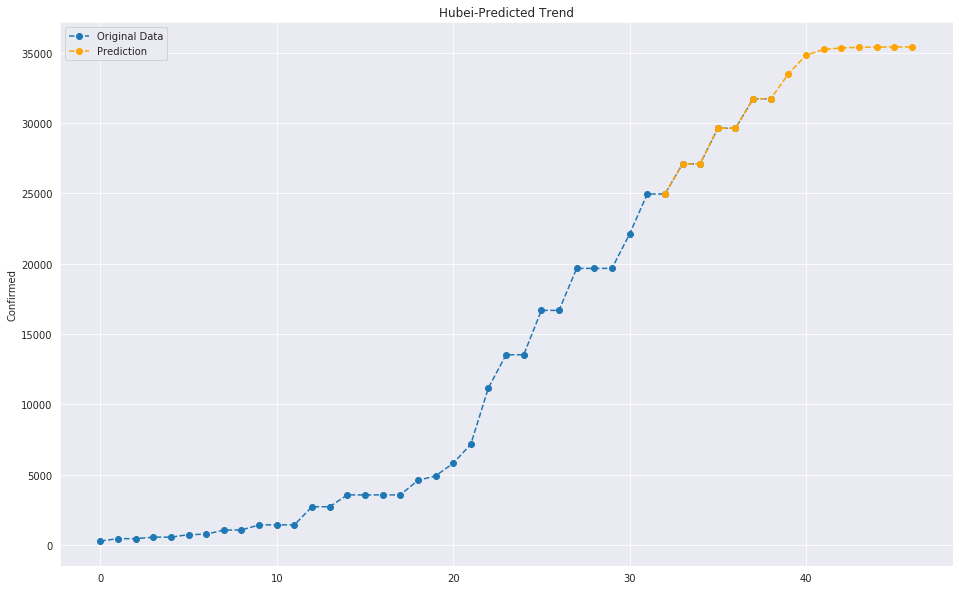

In [0]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
plt.title('Hubei-Predicted Trend')
plt.ylabel('Confirmed')
# plt.grid(True)
plt.autoscale(axis='x' )
plt.plot(confirmed_data, 'o--',label='Original Data')
plt.plot(np.arange(32,47,1),actual_predictions,'o--',color='orange',label='Prediction')
plt.legend()
plt.savefig('HubeiGraph.png')

# Overall Mainland China


In [0]:
china_df

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50
0,Anhui,Mainland China,31.82571,117.22640,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665.0,733.0,733.0,779.0,779.0,830.0,830.0,830.0,860
1,Beijing,Mainland China,40.18238,116.41420,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297.0,315.0,315.0,326.0,326.0,337.0,337.0,337.0,342
2,Chongqing,Mainland China,30.05718,107.87400,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,247.0,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415.0,426.0,428.0,446.0,450.0,468.0,473.0,486.0,489
3,Fujian,Mainland China,26.07783,117.98950,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224.0,239.0,239.0,250.0,250.0,261.0,261.0,261.0,267
4,Gansu,Mainland China,36.06110,103.83430,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67.0,71.0,79.0,79.0,79.0,83.0,83.0,86.0,86
5,Guangdong,Mainland China,23.33841,113.42200,17.0,26.0,32.0,53.0,53.0,78.0,78.0,98.0,111.0,146.0,151.0,151.0,151.0,207.0,207.0,241.0,277.0,277.0,311.0,354.0,436.0,535.0,683.0,725.0,797.0,870.0,895.0,944.0,970.0,970.0,1034.0,1075.0,1095.0,1120.0,1131.0,1151.0,1159.0,1159.0,1177
6,Guangxi,Mainland China,23.82908,108.78810,0.0,2.0,5.0,13.0,23.0,23.0,23.0,33.0,36.0,46.0,46.0,46.0,51.0,51.0,51.0,58.0,58.0,58.0,78.0,78.0,87.0,100.0,127.0,139.0,139.0,150.0,150.0,168.0,168.0,168.0,172.0,183.0,183.0,195.0,195.0,210.0,210.0,210.0,215
7,Guizhou,Mainland China,26.81536,106.87480,0.0,1.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,12.0,12.0,29.0,29.0,46.0,56.0,56.0,64.0,64.0,69.0,71.0,71.0,81.0,89.0,89.0,96.0,99.0,109.0,109.0,109.0,127
8,Hainan,Mainland China,19.19673,109.74550,0.0,4.0,5.0,8.0,8.0,17.0,19.0,19.0,22.0,22.0,33.0,33.0,33.0,40.0,40.0,43.0,43.0,43.0,43.0,46.0,52.0,62.0,71.0,79.0,79.0,91.0,91.0,100.0,106.0,106.0,117.0,124.0,124.0,128.0,131.0,136.0,138.0,138.0,144
9,Hebei,Mainland China,38.04280,114.51490,0.0,1.0,1.0,2.0,2.0,8.0,8.0,13.0,13.0,18.0,18.0,18.0,33.0,33.0,33.0,48.0,48.0,48.0,65.0,65.0,82.0,96.0,113.0,126.0,126.0,135.0,135.0,157.0,157.0,157.0,172.0,195.0,195.0,206.0,206.0,218.0,218.0,218.0,239


In [0]:
china_df_data = china_df.iloc[:,4:].values.sum(axis=0)
china_df_data

array([  325.,   547.,   639.,   865.,   916.,  1320.,  1399.,  1979.,
        2062.,  2737.,  2825.,  2863.,  4409.,  4610.,  5494.,  5970.,
        6070.,  6070.,  7678.,  8124.,  9783., 11860., 17114., 20014.,
       20400., 24290., 24391., 28017., 28085., 28088., 31215., 34569.,
       34620., 37198., 37232., 40160., 40196., 42310., 42670.])

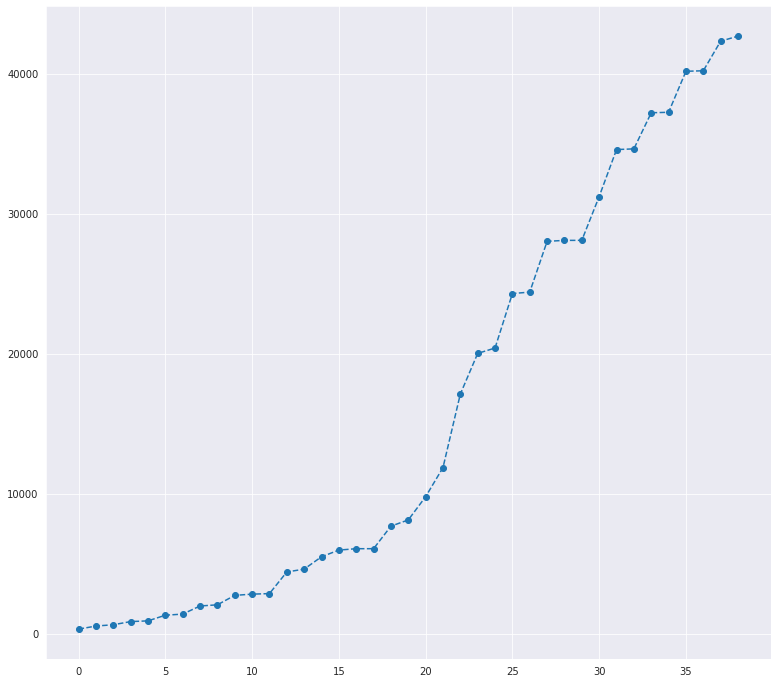

In [0]:
plt.figure(figsize=(13,12))
sns.set_style("darkgrid")
plt.plot([i for i in range(len(china_df_data))],china_df_data,'o--')

In [0]:
divide = 8
china_train_data = china_df_data[:-divide]
china_test_data = china_df_data[-divide:]
print("Length of Train {}, Test {}".format(len(china_train_data), len(china_test_data)))

Length of Train 31, Test 8


In [0]:
scaler = StandardScaler()
china_train_data_standarized = scaler.fit_transform(china_train_data.reshape(-1,1))
china_train_data_standarized

array([[-0.96679028],
       [-0.94461832],
       [-0.93542994],
       [-0.91285849],
       [-0.90776493],
       [-0.86741595],
       [-0.85952593],
       [-0.80159919],
       [-0.79330967],
       [-0.72589492],
       [-0.71710604],
       [-0.71331084],
       [-0.5589061 ],
       [-0.53883149],
       [-0.45054314],
       [-0.40300326],
       [-0.39301589],
       [-0.39301589],
       [-0.23241898],
       [-0.18787531],
       [-0.02218485],
       [ 0.18525282],
       [ 0.70998923],
       [ 0.99962296],
       [ 1.0381742 ],
       [ 1.42668289],
       [ 1.43677013],
       [ 1.79891216],
       [ 1.80570357],
       [ 1.80600319],
       [ 2.11830825]])

In [0]:
china_train_data_standarized_tensor = torch.FloatTensor(china_train_data_standarized).view(-1)
china_train_data_standarized_tensor

tensor([-0.9668, -0.9446, -0.9354, -0.9129, -0.9078, -0.8674, -0.8595, -0.8016,
        -0.7933, -0.7259, -0.7171, -0.7133, -0.5589, -0.5388, -0.4505, -0.4030,
        -0.3930, -0.3930, -0.2324, -0.1879, -0.0222,  0.1853,  0.7100,  0.9996,
         1.0382,  1.4267,  1.4368,  1.7989,  1.8057,  1.8060,  2.1183])

In [0]:
china_train_data_std_inout = create_inout_sequences(china_train_data_standarized_tensor,1)
china_train_data_std_inout

[(tensor([-0.9668]), tensor([-0.9446])),
 (tensor([-0.9446]), tensor([-0.9354])),
 (tensor([-0.9354]), tensor([-0.9129])),
 (tensor([-0.9129]), tensor([-0.9078])),
 (tensor([-0.9078]), tensor([-0.8674])),
 (tensor([-0.8674]), tensor([-0.8595])),
 (tensor([-0.8595]), tensor([-0.8016])),
 (tensor([-0.8016]), tensor([-0.7933])),
 (tensor([-0.7933]), tensor([-0.7259])),
 (tensor([-0.7259]), tensor([-0.7171])),
 (tensor([-0.7171]), tensor([-0.7133])),
 (tensor([-0.7133]), tensor([-0.5589])),
 (tensor([-0.5589]), tensor([-0.5388])),
 (tensor([-0.5388]), tensor([-0.4505])),
 (tensor([-0.4505]), tensor([-0.4030])),
 (tensor([-0.4030]), tensor([-0.3930])),
 (tensor([-0.3930]), tensor([-0.3930])),
 (tensor([-0.3930]), tensor([-0.2324])),
 (tensor([-0.2324]), tensor([-0.1879])),
 (tensor([-0.1879]), tensor([-0.0222])),
 (tensor([-0.0222]), tensor([0.1853])),
 (tensor([0.1853]), tensor([0.7100])),
 (tensor([0.7100]), tensor([0.9996])),
 (tensor([0.9996]), tensor([1.0382])),
 (tensor([1.0382]), ten

In [0]:
epochs = 10000
for i in range(epochs):
  model.train()
  # prev = 0
  for seq,labels in china_train_data_std_inout:
    optimizer.zero_grad()
    # if prev!=0:
    #   seq = prev
    model.hidden_cell = (torch.zeros(1,1,model.hidden_layer_size), torch.zeros(1,1,model.hidden_layer_size))
    y_pred = model(seq)
    # prev = y_pred
    single_loss = loss_func(y_pred, labels)
    single_loss.backward()
    optimizer.step()
  if i % 10 == 0:
    print('Epoch : {}, Loss: {:.9f}'.format(i, single_loss.data))
print('Optimization Complete')

Epoch : 0, Loss: 0.048372008
Epoch : 10, Loss: 0.036681909
Epoch : 20, Loss: 0.047898669
Epoch : 30, Loss: 0.049057566
Epoch : 40, Loss: 0.044591341
Epoch : 50, Loss: 0.040058166
Epoch : 60, Loss: 0.037289627
Epoch : 70, Loss: 0.038424544
Epoch : 80, Loss: 0.042485606
Epoch : 90, Loss: 0.047180571
Epoch : 100, Loss: 0.050696436
Epoch : 110, Loss: 0.052435908
Epoch : 120, Loss: 0.052588124
Epoch : 130, Loss: 0.051344071
Epoch : 140, Loss: 0.049207602
Epoch : 150, Loss: 0.046877120
Epoch : 160, Loss: 0.044721078
Epoch : 170, Loss: 0.042831685
Epoch : 180, Loss: 0.041271921
Epoch : 190, Loss: 0.040182188
Epoch : 200, Loss: 0.039734293
Epoch : 210, Loss: 0.039931241
Epoch : 220, Loss: 0.040599633
Epoch : 230, Loss: 0.041659493
Epoch : 240, Loss: 0.043177832
Epoch : 250, Loss: 0.045121543
Epoch : 260, Loss: 0.047288712
Epoch : 270, Loss: 0.049489208
Epoch : 280, Loss: 0.051542368
Epoch : 290, Loss: 0.053192690
Epoch : 300, Loss: 0.054280076
Epoch : 310, Loss: 0.054837860
Epoch : 320, Loss: 

In [0]:
china_test_inputs = china_test_data.tolist()
china_test_inputs_std = scaler.fit_transform(np.array(china_test_inputs).reshape(-1,1)).reshape(1,-1)[0].tolist()
china_test_inputs_std

[-1.3573723376641444,
 -1.3402810833430332,
 -0.4763349335425419,
 -0.4649407639951344,
 0.5162983076169052,
 0.5283627224318074,
 1.23681197017356,
 1.3574561183225813]

In [0]:
model.eval()
print(model)
for i in range(fut_pred):
  seq = torch.FloatTensor(china_test_inputs_std[-1:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1, model.hidden_layer_size), torch.zeros(1,1, model.hidden_layer_size))
    # print(seq, model(seq).item())
    # input()
    china_test_inputs_std.append(model(seq).item())

china_test_inputs_std

LSTMModel(
  (lstm): LSTM(1, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


[-1.3573723376641444,
 -1.3402810833430332,
 -0.4763349335425419,
 -0.4649407639951344,
 0.5162983076169052,
 0.5283627224318074,
 1.23681197017356,
 1.3574561183225813,
 1.9688297510147095,
 2.545454740524292,
 3.4004273414611816,
 4.028088092803955,
 4.136114597320557,
 4.139807224273682,
 4.134693622589111,
 4.130177021026611]

In [0]:
actual_predictions_china = scaler.inverse_transform(np.array(china_test_inputs_std[1:]).reshape(-1,1))
# actual_predictions = (np.array(test_inputs[1:]) * std) + mean
actual_predictions_china[fut_pred:]

array([[46214.96683473],
       [48766.18992395],
       [50639.11848245],
       [50961.46765746],
       [50972.48639085],
       [50957.22749404],
       [50943.75003502]])

In [0]:
# actual_predictions = actual_predictions[0].reshape(1,-1)
actual_predictions_china.shape
actual_predictions_china

array([[34620.        ],
       [37198.        ],
       [37232.        ],
       [40160.        ],
       [40196.        ],
       [42310.        ],
       [42670.        ],
       [44494.32808508],
       [46214.96683473],
       [48766.18992395],
       [50639.11848245],
       [50961.46765746],
       [50972.48639085],
       [50957.22749404],
       [50943.75003502]])

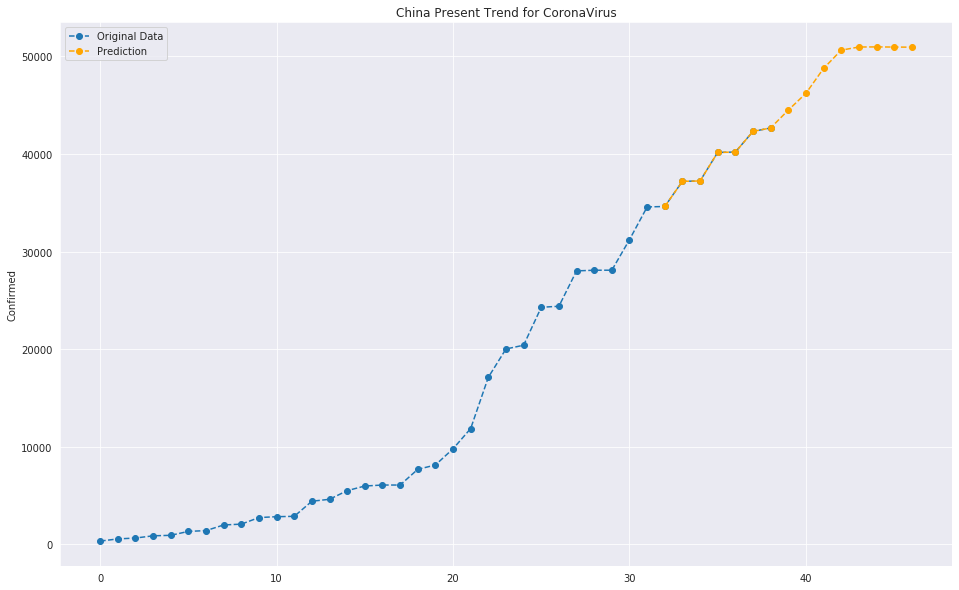

In [0]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
plt.title('China Present Trend for CoronaVirus')
plt.ylabel('Confirmed')
# plt.grid(True)
plt.autoscale(axis='x' )
plt.plot(china_df_data, 'o--',label='Original Data')
plt.plot(np.arange(32,47,1),actual_predictions_china,'o--',color='orange',label='Prediction')
plt.legend()
plt.savefig('Graph_WCHINA.png')

# Recovery


In [0]:
dfrecovered = pd.read_csv('Recovered.csv')
dfrecovered.iloc[:,4:] = dfrecovered.iloc[:,4:].fillna(0)
dfrecovered

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 10:24,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50
0,Anhui,Mainland China,31.82571,117.2264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,3.0,5.0,7.0,14.0,14.0,20.0,23.0,23.0,34.0,34.0,47.0,47.0,59.0,59.0,72.0,73.0,88.0,88.0,105
1,Beijing,Mainland China,40.18238,116.4142,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,9.0,9.0,12.0,12.0,23.0,24.0,31.0,31.0,31.0,33.0,34.0,34.0,37.0,37.0,44.0,44.0,44.0,48
2,Chongqing,Mainland China,30.05718,107.8740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,7.0,9.0,9.0,14.0,15.0,15.0,24.0,24.0,31.0,31.0,39.0,39.0,50.0,51.0,66.0,66.0,72
3,Fujian,Mainland China,26.07783,117.9895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,11.0,11.0,14.0,14.0,20.0,20.0,24.0,26.0,35.0,35.0,39.0,39.0,45
4,Gansu,Mainland China,36.06110,103.8343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,4.0,4.0,6.0,6.0,6.0,9.0,9.0,12.0,12.0,15.0,16.0,17.0,21.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,"San Benito, CA",US,36.57610,-120.9876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
69,NaN,Belgium,50.50390,4.4699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
70,"Madison, WI",US,43.07310,-89.4012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
71,Diamond Princess cruise ship,Others,35.44370,129.6380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [0]:
chinarecoverydf = dfrecovered.loc[dfrecovered["Country/Region"] == "Mainland China"]
chinarecoverydf

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 10:24,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50
0,Anhui,Mainland China,31.82571,117.22640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,3.0,5.0,7.0,14.0,14.0,20.0,23.0,23.0,34.0,34.0,47.0,47.0,59.0,59.0,72.0,73.0,88.0,88.0,105
1,Beijing,Mainland China,40.18238,116.41420,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,9.0,9.0,12.0,12.0,23.0,24.0,31.0,31.0,31.0,33.0,34.0,34.0,37.0,37.0,44.0,44.0,44.0,48
2,Chongqing,Mainland China,30.05718,107.87400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,7.0,9.0,9.0,14.0,15.0,15.0,24.0,24.0,31.0,31.0,39.0,39.0,50.0,51.0,66.0,66.0,72
3,Fujian,Mainland China,26.07783,117.98950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,11.0,11.0,14.0,14.0,20.0,20.0,24.0,26.0,35.0,35.0,39.0,39.0,45
4,Gansu,Mainland China,36.06110,103.83430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,4.0,4.0,6.0,6.0,6.0,9.0,9.0,12.0,12.0,15.0,16.0,17.0,21.0,24
5,Guangdong,Mainland China,23.33841,113.42200,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,10.0,11.0,14.0,15.0,21.0,21.0,32.0,49.0,49.0,69.0,69.0,88.0,97.0,112.0,125.0,141.0,147.0,167.0,167.0,212
6,Guangxi,Mainland China,23.82908,108.78810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,7.0,10.0,13.0,14.0,14.0,14.0,17.0,17.0,17.0,18.0,18.0,18.0,24.0,24.0,33
7,Guizhou,Mainland China,26.81536,106.87480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,5.0,9.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,10.0,10.0,17
8,Hainan,Mainland China,19.19673,109.74550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,5.0,5.0,8.0,8.0,10.0,11.0,14.0,15.0,19.0,19.0,19.0,19.0,20
9,Hebei,Mainland China,38.04280,114.51490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,13.0,13.0,22.0,25.0,30.0,30.0,34.0,35.0,41.0,41.0,48


In [0]:
_present = chinarecoverydf.iloc[:,0:2]
_present['Recovered'] = chinarecoverydf.iloc[:,-1]
_present

,Province/State,Country/Region,Recovered
0,Anhui,Mainland China,105
1,Beijing,Mainland China,48
2,Chongqing,Mainland China,72
3,Fujian,Mainland China,45
4,Gansu,Mainland China,24
5,Guangdong,Mainland China,212
6,Guangxi,Mainland China,33
7,Guizhou,Mainland China,17
8,Hainan,Mainland China,20
9,Hebei,Mainland China,48


In [0]:
chinamap = worldmap.loc[worldmap['adm0_a3'] == 'CHN']
chinamap['Recovered'] = 0
# chinamap['Deaths'] = 0
# chinamap['Recovered'] = 0
for states in _present['Province/State'].unique():
  # print(states)
  # print(chinamap['Confirmed'].loc[chinamap['name_en'] == states] )
  # print(grouped_total['Confirmed'].loc[grouped_total['Province/State'] == states].tolist()[0])
  # input()
  chinamap['Recovered'].loc[chinamap['name_en'] == states] = _present['Recovered'].loc[_present['Province/State'] == states].tolist()[0]
  # chinamap['Deaths'].loc[chinamap['name_en'] == states] = grouped_present['Deaths'].loc[grouped_present['Province/State'] == states].tolist()[0]
  # chinamap['Recovered'].loc[chinamap['name_en'] == states] = grouped_present['Recovered'].loc[grouped_present['Province/State'] == states].tolist()[0]
chinamap['coords'] = chinamap['geometry'].apply(lambda x: x.representative_point().coords[:])
chinamap['coords'] = [coords[0] for coords in chinamap['coords']]
chinamap

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remo

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,name_local,type,type_en,code_local,code_hasc,note,hasc_maybe,region,region_cod,provnum_ne,gadm_level,check_me,datarank,abbrev,postal,area_sqkm,sameascity,labelrank,name_len,mapcolor9,mapcolor13,fips,fips_alt,woe_id,woe_label,woe_name,latitude,longitude,sov_a3,adm0_a3,...,gns_id,gns_name,gn_level,gn_region,gn_a1_code,region_sub,sub_code,gns_level,gns_lang,gns_adm1,gns_region,min_label,max_label,min_zoom,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry,Recovered,coords
17,Admin-1 scale rank,2,CHN-1756,1756,CN-65,None,CN,1,Xinjiang,Xinjiang Uygur|Xīnjiāng Wéiwúěr,新疆維吾爾自治區|新疆维吾尔自治区,Zìzhìqu,Autonomous Region,None,CN.XJ,None,None,Northwest China,6,49,1,20,1,None,XJ,0,-99,2,8,4,3,CH13,None,12578003,"Xinjiang, CN, China",Xinjiang,41.1220,85.4253,CH1,CHN,...,-1933787,Xinjiang Uygur Zizhiqu,1,None,CN.13,Western,None,1,uig,CH13,None,4.6,10.1,4.6,Q34800,سنجان,শিনচিয়াং,Xinjiang,Xinjiang,Sinkiang,Xinjiang,Σιντζιάνγκ,शिंजियांग,Hszincsiang-Ujgur Autonóm Terület,Xinjiang,Sinkiang,新疆ウイグル自治区,신장 위구르 자치구,Sinkiang,Sinciang,Xinjiang,Синьцзян-Уйгурский автономный район,Xinjiang,Sincan Uygur Özerk Bölgesi,Tân Cương,新疆维吾尔自治区,1159312657,"POLYGON ((77.88313 35.43107, 77.85709 35.43660...",3,"(87.11170094657875, 41.75680633600004)"
18,Admin-1 scale rank,2,CHN-1662,1662,CN-54,None,CN,1,Xizang,Tibet|Xīzàng,西藏自治區|西藏自治区,Zìzhìqu,Autonomous Region,None,CN.XZ,None,None,Southwest China,5,48,1,20,1,None,XZ,0,-99,2,6,4,3,CH14,None,12578004,"Tibet, CN, China",Xizang,31.4515,88.4137,CH1,CHN,...,-1934604,Xizang Zizhiqu,1,None,CN.14,Western,None,1,zho,CH14,None,4.6,10.1,4.6,Q17269,منطقة التبت ذاتية الحكم,তিব্বত স্বায়ত্তশাসিত অঞ্চল,Tibet,Tibet,Tíbet,Tibet,Θιβέτ,बोड स्वायत्त क्षेत्र,Tibeti Autonóm Terület,Tibet,regione autonoma del Tibet,チベット自治区,티베트 자치구,Tibetaanse Autonome Regio,Tybetański Region Autonomiczny,Região Autônoma do Tibete,Тибетский автономный район,Autonoma regionen Tibet,Tibet Özerk Bölgesi,Khu tự trị Tây Tạng,西藏自治区,1159312655,"POLYGON ((78.91769 33.38626, 78.91595 33.38766...",0,"(87.05266113044819, 31.885470483228566)"
118,Admin-1 scale rank,2,CHN-1838,1838,CN-15,None,CN,1,Inner Mongol,Nei Mongol|Nèiměnggǔ,內蒙古自治區|内蒙古自治区,Zìzhìqu,Autonomous Region,None,CN.NM,None,None,North China,1,43,1,20,1,None,NM,0,-99,2,12,4,3,CH20,None,12578009,"Nei Mongol, CN, China",Inner Mongol,41.5938,111.6230,CH1,CHN,...,-1920094,Nei Mongol Zizhiqu,1,None,CN.20,Western,None,1,zho,CH20,None,4.6,10.1,4.6,Q41079,منغوليا الداخلية,অন্তর্দেশীয় মঙ্গোলিয়া,Innere Mongolei,Inner Mongolia,Mongolia Interior,Mongolie-Intérieure,Εσωτερική Μογγολία,भीतरी मंगोलिया,Belső-Mongólia Autonóm Terület,Mongolia Dalam,Mongolia Interna,内モンゴル自治区,내몽골 자치구,Binnen-Mongolië,Mongolia Wewnętrzna,Mongólia Interior,Внутренняя Монголия,Inre Mongoliet,İç Moğolistan,Nội Mông,内蒙古自治区,1159312757,"POLYGON ((115.91451 47.68391, 115.85270 47.705...",5,"(118.36251766464233, 45.36012563763805)"
124,Admin-1 scale rank,2,CHN-1150,1150,CN-62,None,CN,1,Gansu,Gānsù,甘肅|甘肃,Shěng,Province,None,CN.GS,None,None,Northwest China,6,39,1,20,1,None,GS,0,-99,2,5,4,3,CH15,None,12578005,"Gansu, CN, China",Gansu,38.7393,100.7350,CH1,CHN,...,-1906131,Gansu Sheng,1,None,CN.15,Western,None,1,zho,CH15,None,4.6,10.1,4.6,Q42392,قانسو,কানসু,Gansu,Gansu,Gansu,Gansu,Γκανσού,गांसू,Kanszu,Gansu,Gansu,甘粛省,간쑤성,Gansu,Gansu,Gansu,Ганьсу,Gansu,Kansu,Cam Túc,甘肃省,1159310923,"POLYGON ((96.36634 42.72292, 96.37926 42.72055...",24,"(102.87796930504012, 37.69377187767)"
261,Admin-1 scale rank,2,CHN-1810,1810,CN-53,None,CN,1,Yunnan,Yúnnán,雲南|云南,Shěng,Province,None,CN.YN,None,None,Southwest China,5,47,1,20,1,None,YN,0,-99,2,6,4,3,CH29,None,12578018,"Yunnan, CN, China",Yunnan,24.4603,101.6610,CH1,CHN,...,-1937567,Yunnan Sheng,1,None,CN.29,Western,None,1,zho,CH29,None,4.6,10.1,4.6,Q43194,يونان,ইউনান,Yunnan,Yunnan,Yunnan,Yunnan,Γιουνάν,य

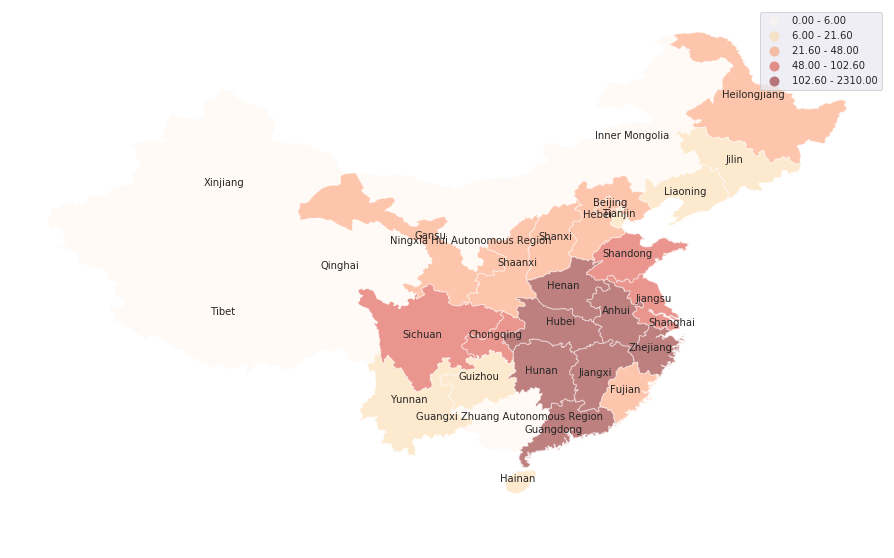

In [0]:
fig,ax = plt.subplots(figsize=(32,10))
ax.axis('off')
chinamap.plot(ax=ax, alpha=0.5, column='Recovered', cmap='OrRd', scheme='quantiles', legend=True)
for idx, rows in chinamap.iterrows():
  plt.annotate(s=rows['name_en'], xy=rows['coords'], horizontalalignment='center')
plt.savefig('China-Recovered-Present.png')

In [0]:
china_recovered_data = chinarecoverydf.iloc[:,4:].values.sum(axis=0)
china_recovered_data

array([  25.,   28.,   30.,   34.,   36.,   38.,   39.,   49.,   49.,
         51.,   56.,   58.,   60.,   73.,  101.,  104.,  107.,  120.,
        127.,  135.,  214.,  275.,  478.,  612.,  636.,  890., 1015.,
       1189., 1366., 1371., 1750., 1981., 2373., 2678., 2898., 3286.,
       3549., 3921., 4299.])

In [0]:
divide = 8
china_recover_train_data = china_recovered_data[:-divide]
china_recover_test_data = china_recovered_data[-divide:]
print('Length of Train Data: {}, Test Data : {}'.format(len(china_recover_train_data), len(china_recover_test_data)))

Length of Train Data: 31, Test Data : 8


In [0]:
scaler = StandardScaler()
recover_train_data_standarized = scaler.fit_transform(china_recover_train_data.reshape(-1,1))
recover_train_data_standarized

array([[-0.68746956],
       [-0.68128692],
       [-0.67716516],
       [-0.66892164],
       [-0.66479989],
       [-0.66067813],
       [-0.65861725],
       [-0.63800845],
       [-0.63800845],
       [-0.63388669],
       [-0.62358229],
       [-0.61946053],
       [-0.61533877],
       [-0.58854734],
       [-0.53084271],
       [-0.52466007],
       [-0.51847743],
       [-0.491686  ],
       [-0.47725984],
       [-0.4607728 ],
       [-0.29796331],
       [-0.17224965],
       [ 0.24610892],
       [ 0.52226679],
       [ 0.5717279 ],
       [ 1.09519133],
       [ 1.35280129],
       [ 1.71139434],
       [ 2.07617004],
       [ 2.08647444],
       [ 2.86754782]])

In [0]:
recover_train_data_standarized_tensor = torch.FloatTensor(recover_train_data_standarized).view(-1)
recover_train_data_standarized_tensor

tensor([-0.6875, -0.6813, -0.6772, -0.6689, -0.6648, -0.6607, -0.6586, -0.6380,
        -0.6380, -0.6339, -0.6236, -0.6195, -0.6153, -0.5885, -0.5308, -0.5247,
        -0.5185, -0.4917, -0.4773, -0.4608, -0.2980, -0.1722,  0.2461,  0.5223,
         0.5717,  1.0952,  1.3528,  1.7114,  2.0762,  2.0865,  2.8675])

In [0]:
recover_train_data_std_inout = create_inout_sequences(recover_train_data_standarized_tensor,1)
recover_train_data_std_inout

[(tensor([-0.6875]), tensor([-0.6813])),
 (tensor([-0.6813]), tensor([-0.6772])),
 (tensor([-0.6772]), tensor([-0.6689])),
 (tensor([-0.6689]), tensor([-0.6648])),
 (tensor([-0.6648]), tensor([-0.6607])),
 (tensor([-0.6607]), tensor([-0.6586])),
 (tensor([-0.6586]), tensor([-0.6380])),
 (tensor([-0.6380]), tensor([-0.6380])),
 (tensor([-0.6380]), tensor([-0.6339])),
 (tensor([-0.6339]), tensor([-0.6236])),
 (tensor([-0.6236]), tensor([-0.6195])),
 (tensor([-0.6195]), tensor([-0.6153])),
 (tensor([-0.6153]), tensor([-0.5885])),
 (tensor([-0.5885]), tensor([-0.5308])),
 (tensor([-0.5308]), tensor([-0.5247])),
 (tensor([-0.5247]), tensor([-0.5185])),
 (tensor([-0.5185]), tensor([-0.4917])),
 (tensor([-0.4917]), tensor([-0.4773])),
 (tensor([-0.4773]), tensor([-0.4608])),
 (tensor([-0.4608]), tensor([-0.2980])),
 (tensor([-0.2980]), tensor([-0.1722])),
 (tensor([-0.1722]), tensor([0.2461])),
 (tensor([0.2461]), tensor([0.5223])),
 (tensor([0.5223]), tensor([0.5717])),
 (tensor([0.5717]), t

In [0]:
epochs = 10000
for i in range(epochs):
  model.train()
  # prev = 0
  for seq,labels in recover_train_data_std_inout:
    optimizer.zero_grad()
    # if prev!=0:
    #   seq = prev
    model.hidden_cell = (torch.zeros(1,1,model.hidden_layer_size), torch.zeros(1,1,model.hidden_layer_size))
    y_pred = model(seq)
    # prev = y_pred
    single_loss = loss_func(y_pred, labels)
    single_loss.backward()
    optimizer.step()
  if i % 10 == 0:
    print('Epoch : {}, Loss: {:.9f}'.format(i, single_loss.data))
print('Optimization Complete')

Epoch : 0, Loss: 0.148657456
Epoch : 10, Loss: 0.148601577
Epoch : 20, Loss: 0.149495333
Epoch : 30, Loss: 0.149901405
Epoch : 40, Loss: 0.149777919
Epoch : 50, Loss: 0.149575740
Epoch : 60, Loss: 0.149768144
Epoch : 70, Loss: 0.150077030
Epoch : 80, Loss: 0.150200084
Epoch : 90, Loss: 0.150191024
Epoch : 100, Loss: 0.150249422
Epoch : 110, Loss: 0.150401950
Epoch : 120, Loss: 0.150526613
Epoch : 130, Loss: 0.150587484
Epoch : 140, Loss: 0.150646523
Epoch : 150, Loss: 0.150738329
Epoch : 160, Loss: 0.150831476
Epoch : 170, Loss: 0.150903523
Epoch : 180, Loss: 0.150965944
Epoch : 190, Loss: 0.151037291
Epoch : 200, Loss: 0.151109755
Epoch : 210, Loss: 0.151175007
Epoch : 220, Loss: 0.151234344
Epoch : 230, Loss: 0.151293322
Epoch : 240, Loss: 0.151353970
Epoch : 250, Loss: 0.151412413
Epoch : 260, Loss: 0.151466966
Epoch : 270, Loss: 0.151518568
Epoch : 280, Loss: 0.151569054
Epoch : 290, Loss: 0.151618257
Epoch : 300, Loss: 0.151667088
Epoch : 310, Loss: 0.151712775
Epoch : 320, Loss: 

In [0]:
china_test_inputs = china_recover_test_data.tolist()
china_test_inputs_std = scaler.fit_transform(np.array(china_test_inputs).reshape(-1,1)).reshape(1,-1)[0].tolist()
china_test_inputs_std

[-1.5500894954801174,
 -1.0180679722421127,
 -0.6041226544166245,
 -0.30553914647692804,
 0.22105358570762754,
 0.577996597471901,
 1.0828741654426606,
 1.5958949199935935]

In [0]:
model.eval()
print(model)
for i in range(fut_pred):
  seq = torch.FloatTensor(china_test_inputs_std[-1:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1, model.hidden_layer_size), torch.zeros(1,1, model.hidden_layer_size))
    # print(seq, model(seq).item())
    # input()
    china_test_inputs_std.append(model(seq).item())

china_test_inputs_std

LSTMModel(
  (lstm): LSTM(1, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


[-1.5500894954801174,
 -1.0180679722421127,
 -0.6041226544166245,
 -0.30553914647692804,
 0.22105358570762754,
 0.577996597471901,
 1.0828741654426606,
 1.5958949199935935,
 2.263026237487793,
 3.490077495574951,
 5.06960391998291,
 5.1962056159973145,
 5.219512462615967,
 5.230717658996582,
 5.236806869506836,
 5.2403717041015625]

In [0]:
actual_predictions_china = scaler.inverse_transform(np.array(china_test_inputs_std[1:]).reshape(-1,1))
# actual_predictions = (np.array(test_inputs[1:]) * std) + mean
actual_predictions_china[fut_pred:]

array([[5694.65701235],
       [6858.47150354],
       [6951.75318984],
       [6968.92596101],
       [6977.18208748],
       [6981.66869265],
       [6984.29530662]])

In [0]:
# actual_predictions = actual_predictions[0].reshape(1,-1)
actual_predictions_china.shape
actual_predictions_china

array([[2373.        ],
       [2678.        ],
       [2898.        ],
       [3286.        ],
       [3549.        ],
       [3921.        ],
       [4299.        ],
       [4790.5505577 ],
       [5694.65701235],
       [6858.47150354],
       [6951.75318984],
       [6968.92596101],
       [6977.18208748],
       [6981.66869265],
       [6984.29530662]])

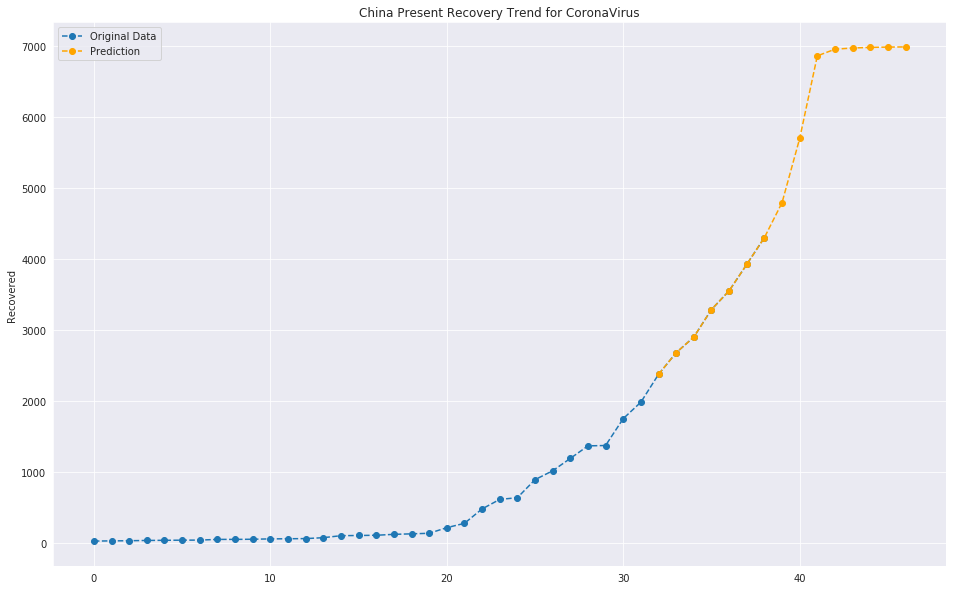

In [0]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
plt.title('China Present Recovery Trend for CoronaVirus')
plt.ylabel('Recovered')
# plt.grid(True)
plt.autoscale(axis='x' )
plt.plot(china_recovered_data, 'o--',label='Original Data')
plt.plot(np.arange(32,47,1),actual_predictions_china,'o--',color='orange',label='Prediction')
plt.legend()
plt.savefig('Recovery_Graph_WCHINA.png')